## python-CTD to plot cnv file from Station P2, Oct 2019 (Kilo Moana, KM1919-20)

## 1750 m cast on Oct 12th, 2019

## downloaded Al's 1 m binned cnv files from the POMZ shared drive

In [119]:
import io
import requests
from pathlib import Path
import seaborn as sns

In [1]:
import ctd


cast = ctd.from_cnv("St20_P2_cast60-align-cellTM-derive-bin-MD.cnv")
down, up = cast.split()

down.head()

,scan,timeS,longitude,latitude,depSMignore,t090C,t190C,c0uS/cm,c1S/m,flECO-AFL,...,sbeox1V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mm/L,sbeox1Mm/L,sbeox0PS,sbeox1PS,flag
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
3.018,465.0,19.346,-106.85835,16.85541,3.0,28.9679,28.9222,56282.0,5.635990,0.0607,...,2.3253,34.3290,34.4156,21.5713,21.6516,194.790,203.831,97.949,102.469,False
4.024,686.0,28.544,-106.85834,16.85540,4.0,28.9753,28.9344,56284.0,5.636276,0.0583,...,2.3282,34.3248,34.4085,21.5657,21.6422,194.851,204.360,97.989,102.751,False
5.030,872.0,36.293,-106.85834,16.85540,5.0,28.9954,28.9642,56288.0,5.637575,0.0564,...,2.3324,34.3133,34.3957,21.5505,21.6227,194.826,204.782,98.002,103.006,False
6.036,889.0,36.981,-106.85834,16.85540,6.0,28.9973,28.9584,56292.0,5.637178,0.0604,...,2.3338,34.3139,34.3968,21.5504,21.6256,195.187,204.679,98.187,102.945,False
7.042,913.0,37.998,-106.85834,16.85540,7.0,28.9993,28.9591,56294.0,5.637454,0.0559,...,2.3283,34.3134,34.3979,21.5494,21.6263,193.937,203.767,97.561,102.488,False


In [2]:
type(cast)

pandas.core.frame.DataFrame

### Plot a second variable in a different axis so we can compare the two:

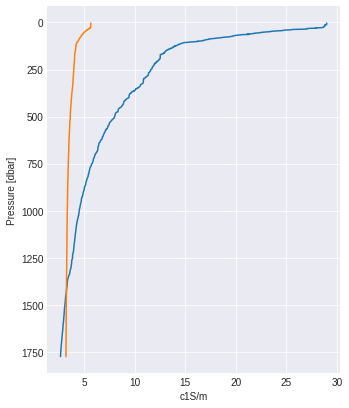

In [6]:
%matplotlib inline

from matplotlib import style

style.use("seaborn-darkgrid")


down["t090C"].plot_cast() # first temp sensor
down["c1S/m"].plot_cast() # conductivity [S/m]

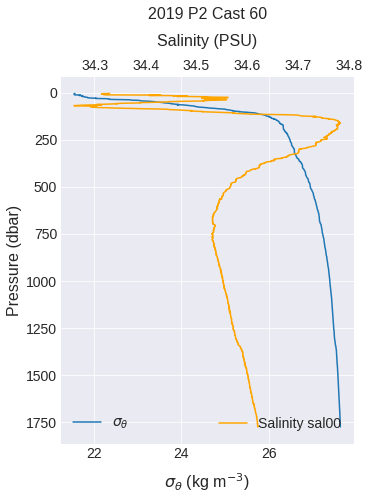

In [9]:
ax0 = down["sigma-�00"].plot_cast(label=r"$\sigma_{\theta}$")
ax1 = down["sal00"].plot_cast(
    ax=ax0,
    label="Salinity sal00",
    color="orange",
    secondary_y=True,
)


ax0.grid(True)
ax1.grid(False)

ax0.set_xlabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)", fontsize = 16, labelpad = 10)
ax1.set_xlabel('Salinity (PSU)', fontsize = 16, labelpad = 13)
ax0.set_ylabel('Pressure (dbar)', fontsize = 16)

ax0.tick_params(axis='y', labelsize=14)
ax0.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

ax0.legend(loc="lower left", fontsize = 14)
ax1.legend(loc="lower right", fontsize = 14)

ax0.set_title('2019 P2 Cast 60', fontsize = 16, pad = 15);

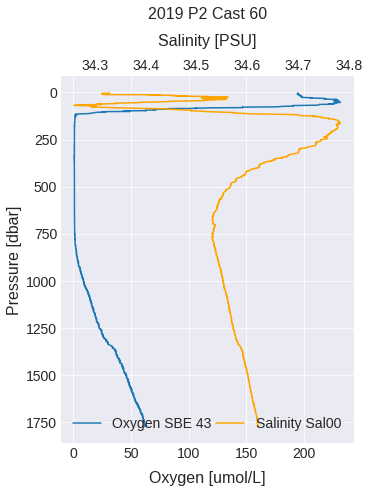

In [11]:
fig = ax0, ax1

ax0 = down["sbeox0Mm/L"].plot_cast(label="Oxygen SBE 43")
ax1 = down["sal00"].plot_cast(
    ax=ax0,
    label="Salinity Sal00",
    color="orange",
    secondary_y=True,
)


ax0.grid(True)
ax1.grid(False)

ax0.set_ylabel('Pressure [dbar]', fontsize = 16)
ax0.set_xlabel('Oxygen [umol/L]', fontsize = 16, labelpad = 10)
ax1.set_xlabel('Salinity [PSU]', fontsize = 16, labelpad = 13)

ax0.tick_params(axis='y', labelsize=14)
ax0.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

ax0.legend(loc="lower left", fontsize = 14)
ax1.legend(loc="lower right", fontsize = 14)

ax0.set_title('2019 P2 Cast 60', fontsize = 16, pad = 15);

In [12]:
def make_patch_spines_invisible(ax):
    
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

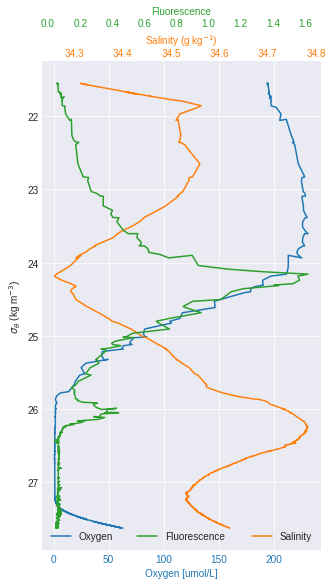

In [13]:
# density plot

import matplotlib.pyplot as plt

fig, ax0 = plt.subplots(figsize=(5, 9))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

ax0.invert_yaxis()
ax1 = ax0.twiny()
ax2 = ax0.twiny()

(l0,) = ax0.plot(cast["sbeox0Mm/L"], cast["sigma-�00"], color=colors[0], label="Oxygen")
ax0.set_xlabel("Oxygen [umol/L]")

ax0.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")

(l1,) = ax1.plot(cast["sal00"], cast["sigma-�00"], color=colors[1], label="Salinity")
ax1.set_xlabel("Salinity (g kg$^{-1}$)")

(l2,) = ax2.plot(
    cast["flECO-AFL"], cast["sigma-�00"], color=colors[2], label="Fluorescence")
ax2.set_xlabel("Fluorescence")

make_patch_spines_invisible(ax2)
ax2.spines["top"].set_position(("axes", 1.06))
ax2.spines["top"].set_visible(True)

ax0.xaxis.label.set_color(l0.get_color())
ax1.xaxis.label.set_color(l1.get_color())
ax2.xaxis.label.set_color(l2.get_color())

ax0.tick_params(axis="x", colors=l0.get_color())
ax1.tick_params(axis="x", colors=l1.get_color())
ax2.tick_params(axis="x", colors=l2.get_color())

ax0.grid(True)
ax1.grid(False)
ax2.grid(False)

ax0.legend(loc="lower left")
ax1.legend(loc="lower right")
ax2.legend(loc="lower center");

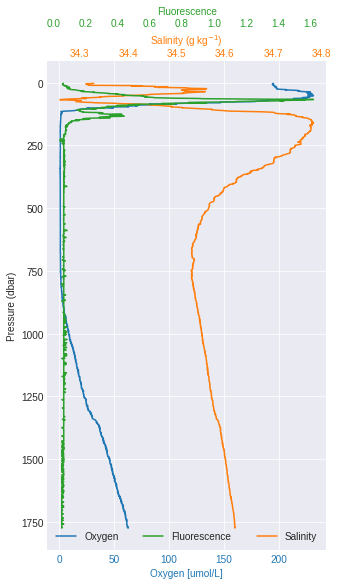

In [17]:
# depth plot 

fig, ax0 = plt.subplots(figsize=(5, 9))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

ax0.invert_yaxis()
ax1 = ax0.twiny()
ax2 = ax0.twiny()

(l0,) = ax0.plot(cast["sbeox0Mm/L"], cast.index, color=colors[0], label="Oxygen")
ax0.set_xlabel("Oxygen [umol/L]")

ax0.set_ylabel('Pressure (dbar)')
#ax0.set_ylim([200,0])

(l1,) = ax1.plot(cast["sal00"], cast.index, color=colors[1], label="Salinity")
ax1.set_xlabel("Salinity (g kg$^{-1}$)")

(l2,) = ax2.plot(
    cast["flECO-AFL"], cast.index, color=colors[2], label="Fluorescence")
ax2.set_xlabel("Fluorescence")

make_patch_spines_invisible(ax2)
ax2.spines["top"].set_position(("axes", 1.06))
ax2.spines["top"].set_visible(True)

ax0.xaxis.label.set_color(l0.get_color())
ax1.xaxis.label.set_color(l1.get_color())
ax2.xaxis.label.set_color(l2.get_color())

ax0.tick_params(axis="x", colors=l0.get_color())
ax1.tick_params(axis="x", colors=l1.get_color())
ax2.tick_params(axis="x", colors=l2.get_color())

ax0.grid(True)
ax1.grid(False)
ax2.grid(False)

ax0.legend(loc="lower left")
ax1.legend(loc="lower right")
ax2.legend(loc="lower center");

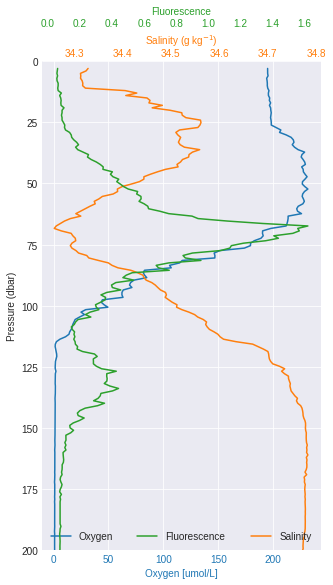

In [18]:
# depth plot but zoomed on upper oxycline

fig, ax0 = plt.subplots(figsize=(5, 9))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

ax0.invert_yaxis()
ax1 = ax0.twiny()
ax2 = ax0.twiny()

(l0,) = ax0.plot(cast["sbeox0Mm/L"], cast.index, color=colors[0], label="Oxygen")
ax0.set_xlabel("Oxygen [umol/L]")

ax0.set_ylabel('Pressure (dbar)')
ax0.set_ylim([200,0])

(l1,) = ax1.plot(cast["sal00"], cast.index, color=colors[1], label="Salinity")
ax1.set_xlabel("Salinity (g kg$^{-1}$)")

(l2,) = ax2.plot(
    cast["flECO-AFL"], cast.index, color=colors[2], label="Fluorescence")
ax2.set_xlabel("Fluorescence")

make_patch_spines_invisible(ax2)
ax2.spines["top"].set_position(("axes", 1.06))
ax2.spines["top"].set_visible(True)

ax0.xaxis.label.set_color(l0.get_color())
ax1.xaxis.label.set_color(l1.get_color())
ax2.xaxis.label.set_color(l2.get_color())

ax0.tick_params(axis="x", colors=l0.get_color())
ax1.tick_params(axis="x", colors=l1.get_color())
ax2.tick_params(axis="x", colors=l2.get_color())

ax0.grid(True)
ax1.grid(False)
ax2.grid(False)

ax0.legend(loc="lower left")
ax1.legend(loc="lower right")
ax2.legend(loc="lower center");

In [20]:
metadata = cast._metadata

metadata.keys()

dict_keys(['header', 'config', 'names', 'skiprows', 'time', 'lon', 'lat', 'name'])

### python-ctd saves the file metadata in a dictionary so that you have easy access later on.

### e.g., sensor serial #s and file creation metadata

In [21]:
print(metadata["header"])

* Sea-Bird SBE 9 Data File:
* FileName = C:\Users\otg\Desktop\CTD Data\km1920\St22_P3_cast77.hex
* Software Version Seasave V 7.26.7.107
* Temperature SN = 5554
* Conductivity SN = 3876
* Number of Bytes Per Scan = 41
* Number of Voltage Words = 4
* Number of Scans Averaged by the Deck Unit = 1
* System UpLoad Time = Oct 17 2019 16:46:18
* NMEA Latitude = 21 59.41 N
* NMEA Longitude = 109 54.01 W
* NMEA UTC (Time) = Oct 17 2019  16:39:26
* Store Lat/Lon Data = Append to Every Scan
* SBE 11plus V 5.2
* number of scans to average = 1
* pressure baud rate = 9600
* NMEA baud rate = 4800
* GPIB address = 1
* autorun on power up is disabled
* S>
** Ship: Kilo Moana
** Station: St22  P3 cast 77
** Operator: gr
* System UTC = Oct 17 2019 16:46:18
*END*
